![alt text](https://global-uploads.webflow.com/5baafc2653bd67278f206724/5be267a03f7813daf821b31e_safegraph-logo-hidpi%403x-p-500.png)


# This notebook is based on a notebook provided by SafeGraph and modified by Alex Berke

It was modified to measure the correlation / reporting bias of devices at the census tract level, constrained to 3 census tracts in MA. 

# "What about bias in your dataset?" 

## Quantifying Sampling Bias in SafeGraph Patterns

--------------
**[Ryan Fox Squire](https://www.linkedin.com/in/ryanfoxsquire/) | Data Scientist, [SafeGraph](https://safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias)**


Oct 2019

--------------
*Share this notebook: [Shareable Link](https://colab.research.google.com/drive/1u15afRytJMsizySFqA2EPlXSh3KTmNTQ#offline=true&sandboxMode=true
)*


## Introduction: "What about bias in your dataset?"

SafeGraph Patterns measures foot-traffic patterns to 3.6MM commercial points-of-interest from over 45MM mobile devices in the United States and provides a monumental window into American commerce. SafeGraph data users look through this window to ask detailed questions about consumer behavior. 
<br/><br/>

![alt text](https://user-images.githubusercontent.com/6432906/67054597-f33e9a80-f0f9-11e9-81e2-777d78ef36d9.png)

###### Image Credit: [123RF Stock Photo ](https://www.123rf.com/profile_elenabsl)
<br/><br/>

A common question we hear from SafeGraph Patterns customers is “What about bias in your dataset?”. "Does your panel really represent the true American public?". "How do we know that your panel isn't oversampling wealthier people?".  This is the kind of sophisticated data skepticism we ***love*** to hear.  A key part of [SafeGraph’s vision](https://blog.safegraph.com/safegraph-vision-and-values-circa-2017-d188d4185df2/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) is to *“Seek the Truth About the World...Of course, data can never be 100% true, but we should strive to make it 100% true.”* 

And although SafeGraph Patterns aggregates data from ~ 10% of devices in the United States (a very impressive sample, if we don't say so ourselves!) this sample is not a perfect representative subset of the population. Like all samples, the SafeGraph dataset has [sampling error](https://en.wikipedia.org/wiki/Sampling_error). 
<br/><br/>

### This is a technical blog post designed for data scientists and analysts to answer the following questions:
* What is Sampling Bias and why is it a problem?
* How biased is the SafeGraph Patterns dataset? How do we quantify sampling bias?

We also include a short preview of a future post:
* How do we correct the sampling bias to answer questions about consumer behavior? (e.g., What is a brand's true customer demographic? Or how far do people travel to visit my stores?)




## What is Sampling Bias?



[Sampling error](https://en.wikipedia.org/wiki/Sampling_error) is the difference between a sample and the population. Here, the “sample” is the panel of devices aggregated into SafeGraph Patterns and the “population” is the US Population. There are many possible causes of sampling error, but usually the most worrisome is **sampling bias**. Sampling bias is problematic because, unlike other sources of errors which diminish as your sample size increases, sampling bias is a systematic error, not helped by increasing sample size.
<br/><br/>

[Sampling bias](https://en.wikipedia.org/wiki/Sampling_bias) goes by multiple names (e.g., selection bias, ascertainment bias... these terms have nuanced technical differences, but are generally used synonymously). **Sampling bias is sampling error that arises from the collection of data from sub-groups of the population disproportionately.**  The intuition is simple: you want to sample from sub-groups of the population proportional to their presence in the population. If your population is 80% women and 20% men, then a true random sample should also approximately be 80% women and 20% men. If your sample is actually 50% men and 50% women, then your sample is biased in favor of men. 







## Why is Sampling Bias (sometimes) a Huge Problem?

Sampling bias can be insidious and is one of the most common types of mistakes in statistical analysis of survey or panel data. 
<br/><br/>

**Example Scenario:** 

 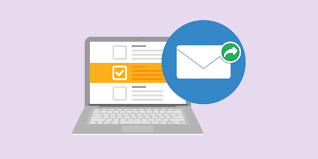

> You manage a national retail business, and you email a survey to all your customers. When you analyze the results, you notice that most of the respondents live in California. In reality, most of your stores are in the Midwest. For whatever reason, your survey has significant sampling bias in favor of California. Customers in California may be different from your customers in the midwest in important ways (e.g. demographics, income, retail alternatives, product preferences, etc.). This is a problem. If you applied the results of your survey to your Midwest locations, then you would have a skewed view which could lead to bad (and expensive) business decisions (like stocking the wrong product mix or launching the wrong marketing campaign or buying the wrong real estate).




How do you know whether sampling bias is a problem in your study? In general, if an independent variable (e.g. a consumer's home state) shows a significant correlation with your outcome variable (e.g. product preferences), then the distribution of this variable in your sample should be similar to the distribution of this variable in the whole population. If it isn’t, then you have a problematic sampling bias.


A [simple random sample](https://en.wikipedia.org/wiki/Simple_random_sample) generally solves sampling bias (and is why random assignment to groups is a critical feature of AB tests). But often in the real world (like the email survey example above) random sampling during data collection isn't possible. You have to work with the data you get, and sometimes that data has sampling bias. 


# How to Quantify Sampling Bias in SafeGraph Patterns

We want to measure the (sampling) bias in the SafeGraph Patterns dataset so that we can answer questions like "How many people visited this store?" and "Who are the customers of my competitor?" without getting a biased or incomplete picture. 






## What is SafeGraph Patterns?
SafeGraph Patterns is a dataset about commercial brick-and-mortar points-of-interest (POI) and  includes anonymized counts of how many people visit these POI each month. The counts of visitors are derived from a panel of anonymized mobile device data (see **What is the Panel Sample?** below). These counts are broken down by different dimensions, including by the **home census block group of the visitor**. For example, the dataset may report that 85 total devices visited a specific POI. It also reports that 50 of those visitors live in census block group X, 25 live in census block Y, and 10 live in census block group Z. 



The aggregated form of SafeGraph Patterns helps to ensure the protection of individuals' privacy, while also providing actionable data for statistical analysis and data science. For all the details on SafeGraph Patterns, see the [SafeGraph Patterns docs](https://docs.safegraph.com/docs/places-schema#section-patterns/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias). 



### What is the Panel Sample?

But what is the sample from which SafeGraph Patterns is aggregated? SafeGraph Patterns is aggregated from a [panel](https://en.wikipedia.org/wiki/Panel_data) (sample of population that is measured longitudinally) of ~40MM mobile devices (e.g., smart phones) in the USA. 

Protecting individual consumer privacy is at the core of the SafeGraph mission:  



> "SafeGraph’s mission is to make the world’s data open for innovation while protecting individuals privacy." - [SafeGraph Vision and Values](https://blog.safegraph.com/safegraph-vision-and-values-circa-2017-d188d4185df2/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias)

The devices in the panel are fully anonymized; **no device-level demographic data exists for devices in the panel**. However, for every device in the panel, SafeGraph *estimates* the home census block group (CBG) of that device, based on the most common location during night time hours. Importantly, none of the anonymized device-specific data is available to us as customers of SafeGraph data; SafeGraph Patterns is an aggregated view. SafeGraph provides an aggregated summary of the panel, [Home Location Distributions by State/Census Block Group](https://docs.safegraph.com/docs/places-schema#section-home-location-distributions-by-state-census-block-group/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias), as part of the Panel Overview Data. 


## We can quantify Sampling Bias by comparing  the Panel Sample to the US Census Population

Since the US Census publishes population and demographic data for every census block group (CBG), we can  use the US Census data as a groundtruth against which to benchmark sampling bias in the panel. 



We will explore sampling bias on several dimensions: 

* Geographic
  * State 
  * County
  * Census Block Group
  
* Demographic (inferred from census block group)
  * Race
  * Educational Attainment
  * Household Income
 
<br/><br/>

To start, let's load up the datasets. 




## Notebook and Data Setup

**Quick Start -- How to use this notebook**
* This is an interactive [Google CoLab notebook](https://colab.research.google.com/notebooks/welcome.ipynb). 
* If you want, you can simply read through and see my code and my results below. Enjoy!
* Moreover, you are viewing an ephemeral copy of this notebook **that you can edit and re-run yourself**. You are highly encouraged to interact with the code and try things--only you can see your ephemeral copy (try double-clicking into this cell right now!)
  * If you want to save your changes, then you save a copy to your own Google Drive.
* As-is, this notebook reads data from a public Google Drive owned by SafeGraph.
  * For this to work, Google will prompt you to login, and confirm that you want to run a notebook written by SafeGraph (you should click "Run Anyway"), and authenticate your user. 
  * Be assured, this notebook does not read any data from your personal drive and your data is not shared with SafeGraph. That's just how Google CoLab reads from Google Drive. 

Pro-Tip for Power Users:
* Alternatively, you can upload your own copy of these datasets into *your* Google Drive and [mount your Google drive to this notebook (see "Bonus Method")](hhttps://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92). This is how I worked with the data during the development of the notebook. It slightly changes how you read the data, so I have left those commands inline below, but commented out with the tag `#ForMountedDrive` in case you prefer this option.
  * All of the datasets used in this notebook can be obtained for free from [SafeGraph.com](https://shop.safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) with the coupon code at the bottom of the notebook.



---

If you want to edit the code interactively, make sure you can run the cell directly below. Otherwise, just read on!

In [ ]:
your_name = "A" # << You can edit this

################################

# These libraries are required to read directly from SafeGraph's public GoogleDrive
# This is not necessary if you mount your own Drive directly. 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################

print("If your name is {0}, then you've successfuly run this cell. \nYou are authenticated and can edit and re-run anything in the notebook. Enjoy!".format(your_name))

If your name is A, then you've successfuly run this cell. 
You are authenticated and can edit and re-run anything in the notebook. Enjoy!


In [ ]:
# #ForMountedDrive -- mount your google drive with the below command
# from google.colab import drive
# drive.mount('/content/drive')

**Load libraries:**

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


#~~~~~~ Display Settings

plt.rcParams['figure.figsize'] = [8, 8]
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

#~~~~~~

import platform
print("This notebook is running python version: {0}".format(platform.python_version()))
print("This notebook is running pandas version: {0}".format(pd.__version__))

# This is what the original author is running:
# This notebook is running python version: 3.6.8
# This notebook is running pandas version: 0.24.2


This notebook is running python version: 3.7.12
This notebook is running pandas version: 1.1.5


In [ ]:
################################

# These functions are required to read directly from SafeGraph's Public Drive
# These are not necessary if you've directly mounted your own google drive

def pd_read_csv_drive(id, drive=drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.csv')  
  return(pd.read_csv('Filename.csv',dtype=dtype))


# Note: OpenCensusData public GDrive folder: https://drive.google.com/open?id=1btSS6zo7_wJCCXAigkbhnaoeU-Voa9pG

drive_ids = {'cbg_b19.csv' : '1d9GscpWbrnP2xNLKKlgd6xLcFTzJydY4',
              'cbg_b01.csv' : '1QqttoDRoKpZM2TyyRwJ8B9c5bYZrHysB',
              'cbg_b02.csv' : '1Zqqf3iLDkDWPl2theLlUm_cAbvznj-Kx',
              'cbg_b15.csv' : '1xeSZShcX3egZFsalGOFD6Ze2jTof6ri-',
              'cbg_field_descriptions.csv' : '1a7_7WxY6eaUIObkVwfknl9C7nPltYxPd',
              'cbg_fips_codes.csv' : '1dB_HeAw11TmsZ8MATMedC9j2csTRAiVm',
             'home_panel_summary.csv': '1aiwhO6Pw1ZfUOoqUf6mS70s9tJgsAVp5'
}

################################

### Load Open Census Data

Census data can be be difficult to navigate, so SafeGraph [packaged all of it in a convenient single download called Open Census Data](https://blog.safegraph.com/download-open-census-data-visualize-neighborhood-insights-9348145bb5f1/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias). 

This notebook is pulling Open Census Data from a public Google Drive created by SafeGraph (See Notebook and Data Setup, above).  

If you want your own copy of Open Census Data, you can [download Open Census Data here](https://www.safegraph.com/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias). See the [SafeGraph Open Census Data docs](https://docs.safegraph.com/docs/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) for documentation on what is included and how the files are organized.



In [ ]:
# #ForMountedDrive --  After Mounting Drive we can access files in your google drive
# sg_ocd_dir = "/content/drive/My Drive/publicly_shared/openCensusData/" # copy/paste path for SafeGraph Open Census Data
# print("expected output is ['metadata', 'geometry', 'data']")
# print(os.listdir(sg_ocd_dir))

The total population of each `census_block_group` is stored in the file `cbg_b01.csv`

In [ ]:
# cbg_b01 = pd.read_csv(sg_ocd_dir + "data/cbg_b01.csv",dtype = {'census_block_group': str}) #ForMountedDrive
cbg_b01 = pd_read_csv_drive(drive_ids['cbg_b01.csv'],dtype = {'census_block_group': str})
columns = ['census_block_group', 'B01001e1']
cbg_b01 = cbg_b01[columns]
cbg_b01.head()

,census_block_group,B01001e1
0,010010201001,745
1,010010201002,1265
2,010010202001,960
3,010010202002,1236
4,010010203001,2364


In [ ]:
# cbg_field_desc = pd.read_csv(sg_ocd_dir + "metadata/cbg_field_descriptions.csv") #ForMountedDrive
cbg_field_desc = pd_read_csv_drive(drive_ids['cbg_field_descriptions.csv'])
print('B01001e1')
print(cbg_field_desc[cbg_field_desc.table_id == 'B01001e1'].field_full_name)
 

B01001e1
4    SEX BY AGE: Total: Total population -- (Estimate)
Name: field_full_name, dtype: object


So, `B01001e1` is the `table_id` code for the  `Total Population`. This dataset tells us the Total Population for each census block group. 

For the sake of clarity, we rename this column.


In [ ]:
cbg_b01.rename({'B01001e1':'census_population'}, axis='columns', inplace=True)

total_usa_pop = cbg_b01['census_population'].sum()
print("Total USA population according to US Census: {0}".format(total_usa_pop))

Total USA population according to US Census: 322087547


### Load SafeGraph Panel Summary


In [ ]:
# #ForMountedDrive - Upload your patterns data to Google drive and copy the path
# patterns_path = "/content/drive/My Drive/publicly_shared/Major-Brands-2019-Oct-CORE-PATTERNS"
# # Confirm correct structure
# print("expected files: ['home_panel_summary.csv','core_poi-patterns.csv','brand_info.csv','visit_panel_summary.csv']")
# os.listdir(patterns_path)

For reference, see [schema of home_panel_summary.csv ](https://docs.safegraph.com/docs/places-schema#section-home-location-distributions-by-state-census-block-group/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias)

This dataset tells us how many devices are residing in each CBG in the SafeGraph dataset.

In [ ]:
# home_panel = pd.read_csv(patterns_path + '/home_panel_summary.csv', dtype = {'census_block_group': str}) #ForMountedDrive
home_panel = pd_read_csv_drive(drive_ids['home_panel_summary.csv'], dtype = {'census_block_group': str})
home_panel.head()

,year,month,state,census_block_group,number_devices_residing
0,2019,9,ak,021580001001,31
1,2019,9,ak,020200023033,114
2,2019,9,ak,021050003001,105
3,2019,9,ak,021700006042,67
4,2019,9,ak,021880001003,8


I want to compute the correlation between number of devices residing and census populations at the census __tract__ level in specific tracts in MA.

counties = ['middlesex', 'norfolk', 'suffolk']

In [ ]:
counties = ['middlesex', 'norfolk', 'suffolk']

In [ ]:
cbg_b01['census_tract'] = [fips[0:11] for fips in cbg_b01.census_block_group]
ct = cbg_b01.groupby(["census_tract"]).sum().reset_index()
ct.head()

,census_tract,census_population
0,01001020100,2010
1,01001020200,2196
2,01001020300,3136
3,01001020400,4563
4,01001020500,10529


In [ ]:
home_panel['census_tract'] = [fips[0:11] for fips in home_panel.census_block_group]
panel = home_panel[(home_panel.state=="ma")].groupby(["census_tract"]).sum()[["number_devices_residing"]].reset_index()
panel.head()

,census_tract,number_devices_residing
0,25001010100,1843
1,25001010206,1339
2,25001010208,392
3,25001010304,400
4,25001010306,244


### Join Census and Home Panel data to compare relative population distribution

In [ ]:
panel = pd.merge(panel,ct)
panel['state_fips'] = [fips[0:2] for fips in panel.census_tract]
panel['county_fips'] = [fips[2:5] for fips in panel.census_tract]
# Also load in FIPS codes for county names
# fips_codes = pd.read_csv(sg_ocd_dir + "metadata/cbg_fips_codes.csv", dtype = {'state_fips': str, 'county_fips':str}) #ForMountedDrive
fips_codes = pd_read_csv_drive(drive_ids['cbg_fips_codes.csv'], dtype = {'state_fips': str, 'county_fips':str})
county_codes = fips_codes[['state_fips','county_fips', 'state', 'county']].drop_duplicates()
panel = pd.merge(panel, county_codes)
panel.head()

,census_tract,number_devices_residing,census_population,state_fips,county_fips,state,county
0,25001010100,1843,2962,25,001,MA,Barnstable County
1,25001010206,1339,3168,25,001,MA,Barnstable County
2,25001010208,392,1589,25,001,MA,Barnstable County
3,25001010304,400,2107,25,001,MA,Barnstable County
4,25001010306,244,2817,25,001,MA,Barnstable County


In [ ]:
print('counties in MA: %s' % len(fips_codes[fips_codes.state == 'MA']))
panel[panel.state == 'MA'].head()

counties in MA: 14


,census_tract,number_devices_residing,census_population,state_fips,county_fips,state,county
0,25001010100,1843,2962,25,001,MA,Barnstable County
1,25001010206,1339,3168,25,001,MA,Barnstable County
2,25001010208,392,1589,25,001,MA,Barnstable County
3,25001010304,400,2107,25,001,MA,Barnstable County
4,25001010306,244,2817,25,001,MA,Barnstable County


Middlesex county (017)

Norfolk county (021)

Suffolk county (025)

In [ ]:
panel = panel[(panel.county_fips=='017') | (panel.county_fips=='021') | (panel.county_fips=='025')]
print('total population for counties (middlesex, norfolk, suffolk): %s' % panel.census_population.sum())
print('total devices for counties (middlesex, norfolk, suffolk): %s' % panel.number_devices_residing.sum())
print('%0.2f %%' % (100*panel.number_devices_residing.sum()/panel.census_population.sum()))
panel.head()

total population for counties (middlesex, norfolk, suffolk): 3026547
total devices for counties (middlesex, norfolk, suffolk): 396061
13.09 %


,census_tract,number_devices_residing,census_population,state_fips,county_fips,state,county
547,25017300100,235,3196,25,017,MA,Middlesex County
548,25017301101,300,4092,25,017,MA,Middlesex County
549,25017301102,361,5277,25,017,MA,Middlesex County
550,25017310100,904,5962,25,017,MA,Middlesex County
551,25017310200,533,6735,25,017,MA,Middlesex County


Check if we are missing any CBGs in the Home Panel dataset, and set the value to 0. 

In [ ]:
missing_cts = panel[panel.number_devices_residing.isnull()].sort_values('census_population', ascending = False)
print("We are missing SG data for {0} tracts containing {1} residents".format(missing_cts.shape[0],missing_cts.census_population.sum()))
panel = panel.fillna(0)
print("Set number_devices_residing to 0 for missing CBGs") # For these, we will set the value to 0, since the panel has 0 devices in these CBGs. 
panel[(panel.number_devices_residing == 0) & (panel.census_population > 0)].head()

We are missing SG data for 0 tracts containing 0 residents
Set number_devices_residing to 0 for missing CBGs


,census_tract,number_devices_residing,census_population,state_fips,county_fips,state,county


In [ ]:
total_population = panel[['census_population','number_devices_residing']].sum(axis = 0)
total_population

census_population          3026547
number_devices_residing     396061
dtype: int64

Briefly, we define some functions given the above framework to aid in exploratory data analysis and visualization.

In [ ]:
# functions for exploratory data analysis and visualization of Sampling Bias


def compute_bias(df, sample_var_col='number_devices_residing', pop_var_col='census_population'):
  # compute bias for a dataframe of observed and expected values
  # returns a pd.Series
  observed_proportion = df[sample_var_col] / df[sample_var_col].sum()*100
  expected_proportion = df[pop_var_col] / df[pop_var_col].sum()*100
  bias = observed_proportion - expected_proportion
  return(bias)
  

def make_center_line_coords(df,x,y):
  # This creates two coords to define the hypothetical line in which x and y are perfectly correlatd
  expected_slope = df[y].sum()/df[x].sum()
  xcoord = np.array([df[x].min(), df[x].max()])
  ycoord = expected_slope*xcoord
  return((xcoord,ycoord))
  
def plot_sg_vs_census(df, xvar, yvar,bias_col='bias',xlim_=None,ylim_=None,text_col=None, num_to_label=5,alpha=0.9,labelfontsize=14):
  # `text_col` is the column used to annotate the points
  # `num_to_label` sets the top num_to_label records sorted by yvar to be annotated
  
  plt.rcParams['figure.figsize'] = [7, 7]
  
  # Report Stats
  pearson_r = df.corr().loc[xvar, yvar]
  print("pearson r: {0:.3f}".format(pearson_r))
  
  # scatter plot
  ax = df.plot.scatter(xvar, yvar, alpha = alpha, edgecolor = 'k', xlim = xlim_, ylim = ylim_)
  # annotate 
  xadj = df[xvar].max()*0.02
  if(text_col is not None):
    for i, point in df.sort_values(by=xvar,ascending=False).iloc[0:num_to_label].iterrows():
      ax.text(point[xvar] + xadj, point[yvar], str(point[text_col]),fontsize=labelfontsize, verticalalignment='center')
  # plot expectation line
  line_coords = make_center_line_coords(df,xvar,yvar)
  plt.plot(line_coords[0],line_coords[1], color = 'k',linestyle='-', linewidth=1)
  return(ax)


In [ ]:
len(panel)

651

## Sampling Bias at the Tract Level

Figure: Tract-Level Sampling Bias
pearson r: 0.122


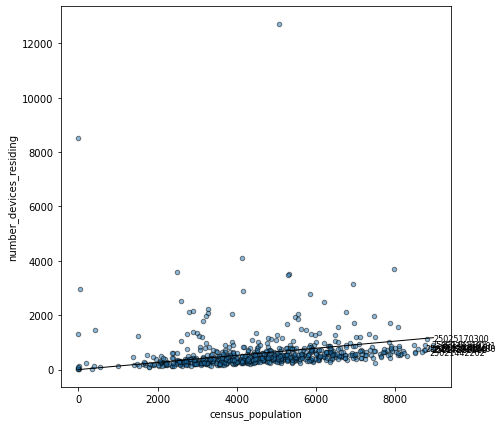

In [ ]:
print("Figure: Tract-Level Sampling Bias")
ax = plot_sg_vs_census(panel,'census_population','number_devices_residing', alpha = 0.5, text_col='census_tract', num_to_label=9,labelfontsize=8)

Figure Explanation:
* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (in panel sample) on the y-axis.
* There is one point for each census tract in the panel. The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 